In [1]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import keras
from matplotlib import pyplot
from numpy import expand_dims
import itertools
from matplotlib import pyplot
%matplotlib inline

from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf


from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.utils.np_utils import to_categorical

from keras.applications import ResNet50
from keras.applications.resnet import preprocess_input
from keras.layers import Resizing

from keras.models import Model

from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras import regularizers, optimizers

from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
IMG_SIZE = (150,150)
BATCH_SIZE = 8

In [3]:
tf.config.list_physical_devices('GPU')



[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
# physical_devices = tf.config.list_physical_devices('GPU')
# try:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)
# except:
#     pass

In [5]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [6]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.333
session = InteractiveSession(config=config)

# Creating a baseline solution

In [7]:
trainDataAug = ImageDataGenerator(
        rescale=1. / 255.,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,       
        shear_range=0.05,
        validation_split=0.25)

In [8]:
valDataAug = ImageDataGenerator(
        rescale=1. / 255.,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,       
        shear_range=0.05,
        validation_split=0.25)

In [9]:
train_dataset= trainDataAug.flow_from_directory(
                                             directory='Dataset/First50/',
                                             subset="training",
                                             batch_size=BATCH_SIZE,
                                             target_size=IMG_SIZE
                                             )

Found 39 images belonging to 3 classes.


In [10]:
validation_dataset=valDataAug.flow_from_directory(
                                             directory='Dataset/First50/',
                                             subset="validation",
                                             batch_size=BATCH_SIZE,
                                             target_size=IMG_SIZE
                                             )

Found 11 images belonging to 3 classes.


In [11]:

NAME = "{}-convFilt-{}-nodes-{}-denseLayers-{}".format(32, 64, 1, int(time.time()))
my_calback_object = TensorBoard(log_dir='logs/{}'.format(NAME),write_images=True,update_freq='epoch')
my_calback_object1=tf.keras.callbacks.ModelCheckpoint(monitor='val_loss',filepath="Graduation Project")

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='Same',activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, kernel_size=(3, 3),padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(16, kernel_size=(3, 3),padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))


model.add(Dense(3, activation="softmax"))
model.compile(optimizer = 'adam', loss = [keras.losses.CategoricalCrossentropy()], metrics = ['acc'])
history = model.fit(train_dataset,epochs=60,validation_data=validation_dataset,callbacks=[my_calback_object,my_calback_object1])



Epoch 1/60
4/5 [=======================>......] - ETA: 0s - loss: 1.0678 - acc: 0.3226    

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 6s 452ms/step - loss: 1.0418 - acc: 0.3077 - val_loss: 0.8984 - val_acc: 0.5455
Epoch 2/60
5/5 [==============================] - ETA: 0s - loss: 0.9029 - acc: 0.5128

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 247ms/step - loss: 0.9029 - acc: 0.5128 - val_loss: 0.7298 - val_acc: 0.5455
Epoch 3/60
5/5 [==============================] - ETA: 0s - loss: 0.9655 - acc: 0.5128

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 276ms/step - loss: 0.9655 - acc: 0.5128 - val_loss: 0.7280 - val_acc: 0.5455
Epoch 4/60
5/5 [==============================] - ETA: 0s - loss: 0.8956 - acc: 0.5385

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 241ms/step - loss: 0.8956 - acc: 0.5385 - val_loss: 0.7926 - val_acc: 0.4545
Epoch 5/60
5/5 [==============================] - ETA: 0s - loss: 0.9157 - acc: 0.5128

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 238ms/step - loss: 0.9157 - acc: 0.5128 - val_loss: 0.8412 - val_acc: 0.5455
Epoch 6/60
5/5 [==============================] - ETA: 0s - loss: 0.9091 - acc: 0.5128

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 220ms/step - loss: 0.9091 - acc: 0.5128 - val_loss: 0.7432 - val_acc: 0.5455
Epoch 7/60
5/5 [==============================] - ETA: 0s - loss: 0.9044 - acc: 0.5641

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 232ms/step - loss: 0.9044 - acc: 0.5641 - val_loss: 0.7478 - val_acc: 0.5455
Epoch 8/60
5/5 [==============================] - ETA: 0s - loss: 0.9156 - acc: 0.5385

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 230ms/step - loss: 0.9156 - acc: 0.5385 - val_loss: 0.7685 - val_acc: 0.5455
Epoch 9/60
5/5 [==============================] - ETA: 0s - loss: 0.8853 - acc: 0.5641

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 278ms/step - loss: 0.8853 - acc: 0.5641 - val_loss: 0.7779 - val_acc: 0.5455
Epoch 10/60
5/5 [==============================] - ETA: 0s - loss: 0.8731 - acc: 0.5897

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 234ms/step - loss: 0.8731 - acc: 0.5897 - val_loss: 0.7363 - val_acc: 0.6364
Epoch 11/60
5/5 [==============================] - ETA: 0s - loss: 0.9106 - acc: 0.5385

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 243ms/step - loss: 0.9106 - acc: 0.5385 - val_loss: 0.7330 - val_acc: 0.6364
Epoch 12/60
5/5 [==============================] - ETA: 0s - loss: 0.8931 - acc: 0.5897

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 240ms/step - loss: 0.8931 - acc: 0.5897 - val_loss: 0.8151 - val_acc: 0.5455
Epoch 13/60
5/5 [==============================] - ETA: 0s - loss: 0.8794 - acc: 0.5641

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 249ms/step - loss: 0.8794 - acc: 0.5641 - val_loss: 0.7176 - val_acc: 0.6364
Epoch 14/60
5/5 [==============================] - ETA: 0s - loss: 0.8718 - acc: 0.5385

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 297ms/step - loss: 0.8718 - acc: 0.5385 - val_loss: 0.7079 - val_acc: 0.6364
Epoch 15/60
5/5 [==============================] - ETA: 0s - loss: 0.8258 - acc: 0.6154

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 227ms/step - loss: 0.8258 - acc: 0.6154 - val_loss: 0.7663 - val_acc: 0.7273
Epoch 16/60
5/5 [==============================] - ETA: 0s - loss: 0.8846 - acc: 0.5897

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 232ms/step - loss: 0.8846 - acc: 0.5897 - val_loss: 0.8112 - val_acc: 0.7273
Epoch 17/60
5/5 [==============================] - ETA: 0s - loss: 0.8686 - acc: 0.6154

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 240ms/step - loss: 0.8686 - acc: 0.6154 - val_loss: 0.7594 - val_acc: 0.7273
Epoch 18/60
5/5 [==============================] - ETA: 0s - loss: 0.7635 - acc: 0.6667

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 254ms/step - loss: 0.7635 - acc: 0.6667 - val_loss: 0.8582 - val_acc: 0.7273
Epoch 19/60
5/5 [==============================] - ETA: 0s - loss: 0.7948 - acc: 0.7179

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 292ms/step - loss: 0.7948 - acc: 0.7179 - val_loss: 0.7463 - val_acc: 0.8182
Epoch 20/60
5/5 [==============================] - ETA: 0s - loss: 0.7066 - acc: 0.7179

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 240ms/step - loss: 0.7066 - acc: 0.7179 - val_loss: 0.7084 - val_acc: 0.7273
Epoch 21/60
5/5 [==============================] - ETA: 0s - loss: 0.6724 - acc: 0.6667

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 228ms/step - loss: 0.6724 - acc: 0.6667 - val_loss: 0.8954 - val_acc: 0.6364
Epoch 22/60
5/5 [==============================] - ETA: 0s - loss: 0.6202 - acc: 0.6923

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 230ms/step - loss: 0.6202 - acc: 0.6923 - val_loss: 0.9924 - val_acc: 0.5455
Epoch 23/60
5/5 [==============================] - ETA: 0s - loss: 0.6949 - acc: 0.6923

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 258ms/step - loss: 0.6949 - acc: 0.6923 - val_loss: 0.7764 - val_acc: 0.7273
Epoch 24/60
5/5 [==============================] - ETA: 0s - loss: 0.6752 - acc: 0.6667

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 267ms/step - loss: 0.6752 - acc: 0.6667 - val_loss: 0.9795 - val_acc: 0.7273
Epoch 25/60
5/5 [==============================] - ETA: 0s - loss: 0.6202 - acc: 0.7179

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 226ms/step - loss: 0.6202 - acc: 0.7179 - val_loss: 1.1103 - val_acc: 0.4545
Epoch 26/60
5/5 [==============================] - ETA: 0s - loss: 0.9084 - acc: 0.6410

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 221ms/step - loss: 0.9084 - acc: 0.6410 - val_loss: 0.7156 - val_acc: 0.6364
Epoch 27/60
5/5 [==============================] - ETA: 0s - loss: 0.6728 - acc: 0.7692

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 228ms/step - loss: 0.6728 - acc: 0.7692 - val_loss: 0.7043 - val_acc: 0.6364
Epoch 28/60
4/5 [=======================>......] - ETA: 0s - loss: 0.8927 - acc: 0.5000

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 241ms/step - loss: 0.8474 - acc: 0.5641 - val_loss: 0.7022 - val_acc: 0.5455
Epoch 29/60
5/5 [==============================] - ETA: 0s - loss: 0.8168 - acc: 0.6410

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 232ms/step - loss: 0.8168 - acc: 0.6410 - val_loss: 0.6955 - val_acc: 0.6364
Epoch 30/60
5/5 [==============================] - ETA: 0s - loss: 0.8794 - acc: 0.6154

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 256ms/step - loss: 0.8794 - acc: 0.6154 - val_loss: 0.6924 - val_acc: 0.5455
Epoch 31/60
5/5 [==============================] - ETA: 0s - loss: 0.8188 - acc: 0.5641

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 245ms/step - loss: 0.8188 - acc: 0.5641 - val_loss: 0.6061 - val_acc: 0.7273
Epoch 32/60
5/5 [==============================] - ETA: 0s - loss: 0.8393 - acc: 0.5897

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 225ms/step - loss: 0.8393 - acc: 0.5897 - val_loss: 0.7224 - val_acc: 0.7273
Epoch 33/60
5/5 [==============================] - ETA: 0s - loss: 0.7496 - acc: 0.6410

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 220ms/step - loss: 0.7496 - acc: 0.6410 - val_loss: 0.6366 - val_acc: 0.6364
Epoch 34/60
5/5 [==============================] - ETA: 0s - loss: 0.6852 - acc: 0.6923

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 338ms/step - loss: 0.6852 - acc: 0.6923 - val_loss: 0.7696 - val_acc: 0.5455
Epoch 35/60
5/5 [==============================] - ETA: 0s - loss: 0.8062 - acc: 0.7179

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 248ms/step - loss: 0.8062 - acc: 0.7179 - val_loss: 0.6708 - val_acc: 0.6364
Epoch 36/60
5/5 [==============================] - ETA: 0s - loss: 0.5712 - acc: 0.6923

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 228ms/step - loss: 0.5712 - acc: 0.6923 - val_loss: 0.8287 - val_acc: 0.5455
Epoch 37/60
5/5 [==============================] - ETA: 0s - loss: 0.5696 - acc: 0.7179

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 241ms/step - loss: 0.5696 - acc: 0.7179 - val_loss: 1.0032 - val_acc: 0.7273
Epoch 38/60
5/5 [==============================] - ETA: 0s - loss: 0.5908 - acc: 0.7179

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 231ms/step - loss: 0.5908 - acc: 0.7179 - val_loss: 1.2654 - val_acc: 0.6364
Epoch 39/60
5/5 [==============================] - ETA: 0s - loss: 0.5082 - acc: 0.7949

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 267ms/step - loss: 0.5082 - acc: 0.7949 - val_loss: 0.9855 - val_acc: 0.7273
Epoch 40/60
5/5 [==============================] - ETA: 0s - loss: 0.5761 - acc: 0.7692

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 263ms/step - loss: 0.5761 - acc: 0.7692 - val_loss: 1.0707 - val_acc: 0.4545
Epoch 41/60
5/5 [==============================] - ETA: 0s - loss: 0.5988 - acc: 0.7179

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 232ms/step - loss: 0.5988 - acc: 0.7179 - val_loss: 0.9464 - val_acc: 0.6364
Epoch 42/60
5/5 [==============================] - ETA: 0s - loss: 0.5387 - acc: 0.7692

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 235ms/step - loss: 0.5387 - acc: 0.7692 - val_loss: 0.6745 - val_acc: 0.6364
Epoch 43/60
5/5 [==============================] - ETA: 0s - loss: 0.4738 - acc: 0.7692

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 236ms/step - loss: 0.4738 - acc: 0.7692 - val_loss: 1.3053 - val_acc: 0.5455
Epoch 44/60
5/5 [==============================] - ETA: 0s - loss: 0.4213 - acc: 0.7692

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 286ms/step - loss: 0.4213 - acc: 0.7692 - val_loss: 1.0421 - val_acc: 0.6364
Epoch 45/60
5/5 [==============================] - ETA: 0s - loss: 0.4277 - acc: 0.8718

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 278ms/step - loss: 0.4277 - acc: 0.8718 - val_loss: 1.0777 - val_acc: 0.6364
Epoch 46/60
5/5 [==============================] - ETA: 0s - loss: 0.4743 - acc: 0.7692

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 269ms/step - loss: 0.4743 - acc: 0.7692 - val_loss: 1.0495 - val_acc: 0.8182
Epoch 47/60
5/5 [==============================] - ETA: 0s - loss: 0.4641 - acc: 0.7949

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 242ms/step - loss: 0.4641 - acc: 0.7949 - val_loss: 1.2829 - val_acc: 0.5455
Epoch 48/60
5/5 [==============================] - ETA: 0s - loss: 0.4924 - acc: 0.7949

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 276ms/step - loss: 0.4924 - acc: 0.7949 - val_loss: 1.0223 - val_acc: 0.7273
Epoch 49/60
5/5 [==============================] - ETA: 0s - loss: 0.3822 - acc: 0.8462

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 238ms/step - loss: 0.3822 - acc: 0.8462 - val_loss: 1.2526 - val_acc: 0.4545
Epoch 50/60
5/5 [==============================] - ETA: 0s - loss: 0.4013 - acc: 0.8718

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 274ms/step - loss: 0.4013 - acc: 0.8718 - val_loss: 1.6362 - val_acc: 0.4545
Epoch 51/60
5/5 [==============================] - ETA: 0s - loss: 0.4465 - acc: 0.7949

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 226ms/step - loss: 0.4465 - acc: 0.7949 - val_loss: 1.4353 - val_acc: 0.4545
Epoch 52/60
5/5 [==============================] - ETA: 0s - loss: 0.3483 - acc: 0.8462

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 242ms/step - loss: 0.3483 - acc: 0.8462 - val_loss: 1.8274 - val_acc: 0.6364
Epoch 53/60
5/5 [==============================] - ETA: 0s - loss: 0.3837 - acc: 0.8718

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 237ms/step - loss: 0.3837 - acc: 0.8718 - val_loss: 1.3548 - val_acc: 0.5455
Epoch 54/60
5/5 [==============================] - ETA: 0s - loss: 0.3624 - acc: 0.7692

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 252ms/step - loss: 0.3624 - acc: 0.7692 - val_loss: 1.5402 - val_acc: 0.5455
Epoch 55/60
5/5 [==============================] - ETA: 0s - loss: 0.3602 - acc: 0.8718

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 280ms/step - loss: 0.3602 - acc: 0.8718 - val_loss: 0.9158 - val_acc: 0.7273
Epoch 56/60
5/5 [==============================] - ETA: 0s - loss: 0.2420 - acc: 0.9487

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 219ms/step - loss: 0.2420 - acc: 0.9487 - val_loss: 1.2477 - val_acc: 0.7273
Epoch 57/60
5/5 [==============================] - ETA: 0s - loss: 0.2150 - acc: 0.8974

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 226ms/step - loss: 0.2150 - acc: 0.8974 - val_loss: 1.7856 - val_acc: 0.5455
Epoch 58/60
5/5 [==============================] - ETA: 0s - loss: 0.2707 - acc: 0.9231

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 219ms/step - loss: 0.2707 - acc: 0.9231 - val_loss: 1.2173 - val_acc: 0.8182
Epoch 59/60
4/5 [=======================>......] - ETA: 0s - loss: 0.1194 - acc: 0.9677

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 233ms/step - loss: 0.1974 - acc: 0.9487 - val_loss: 1.4873 - val_acc: 0.6364
Epoch 60/60
5/5 [==============================] - ETA: 0s - loss: 0.4660 - acc: 0.8205

INFO:tensorflow:Assets written to: Graduation Project\assets


INFO:tensorflow:Assets written to: Graduation Project\assets


5/5 [==============================] - 1s 263ms/step - loss: 0.4660 - acc: 0.8205 - val_loss: 2.1129 - val_acc: 0.5455


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 16)       0

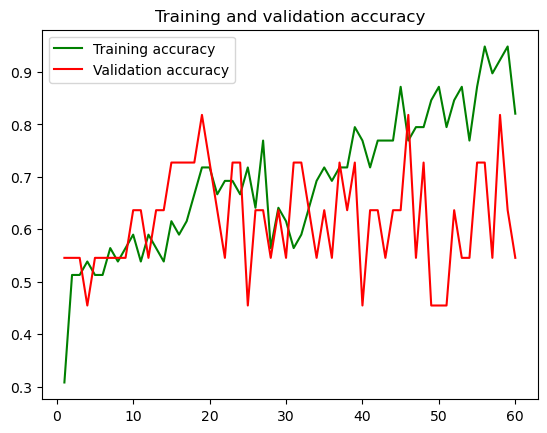

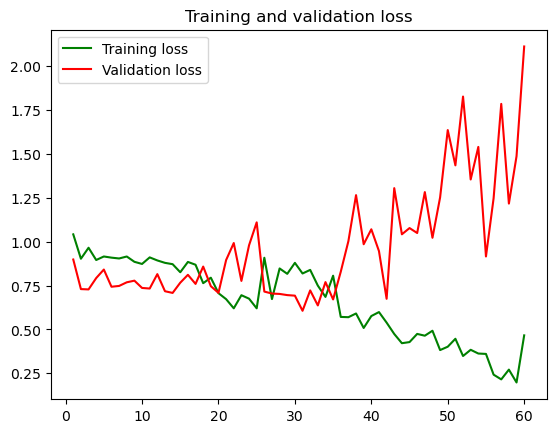

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Understand the prediction done by the CNN model


In [14]:
intermediate_layers =  model.layers[:3]
# The intermediate model with TRAINED existing layers
intermediate_model = Sequential(intermediate_layers)

In [15]:
img=load_img('Dataset/First50/Easy/thumbnail_29.png',target_size=IMG_SIZE)

In [16]:
feature_maps=intermediate_model.predict(np.expand_dims(img,0))

1/1 [==============================] - 0s 262ms/step


In [17]:
feature_maps.shape

(1, 75, 75, 32)

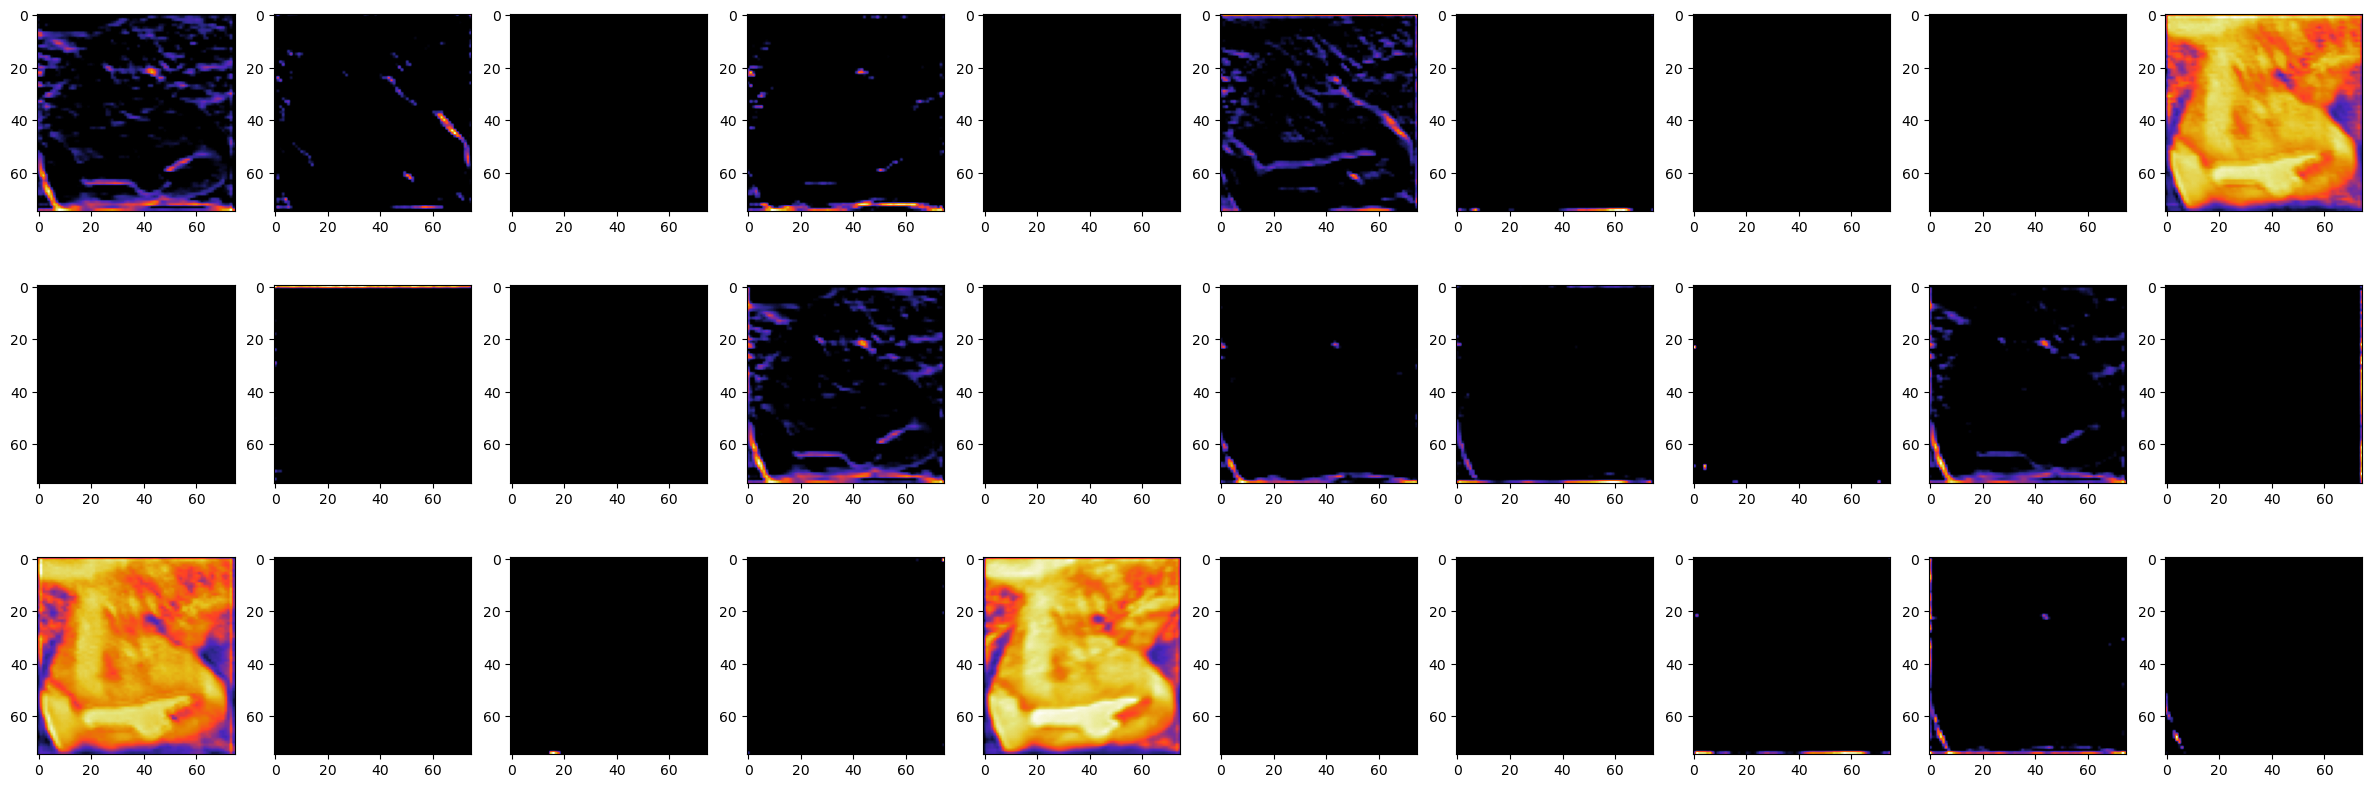

In [18]:
num_rows = 3
num_cols = 10

fig, ax = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(30,10))
for idx, ax_idx in enumerate(list(itertools.product(range(num_rows), range(num_cols)))):
    ax[ax_idx[0], ax_idx[1]].imshow(feature_maps[0,:,:,idx],cmap="CMRmap")